In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(0)
%matplotlib inline

## Generate a random cluster dataset to experiment on X = coordinate points, y = cluster labels, and define random centroids.  We will achieve this with the make_blobs function that we imported from sklearn.datasets, which, as the name implies, generates blobs of data points.

In [17]:
X, y = make_blobs(n_samples=1500, centers=3,n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

n_samples parameter determines the total number of data points generated by the blobs.
centers parameter determines the number of centroids
n_feature attribute defines the number of dimensions generated by the dataset
the data will be two dimensional. In order to generate the same data points in all the iterations (which in turn are generated randomly) for reproducibility of results, we set the random_state parameter to 800
## Print the data

In [18]:
X


array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

## Plot the coordinate points using the scatterplot functionality we imported from matplotlib.pyplot

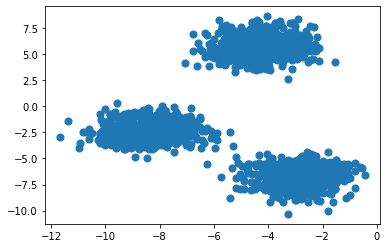

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

## Use the following code to print the array: 

In [20]:
y

array([2, 2, 1, ..., 1, 0, 2])

## Plot the coordinate points with the correct cluster labels

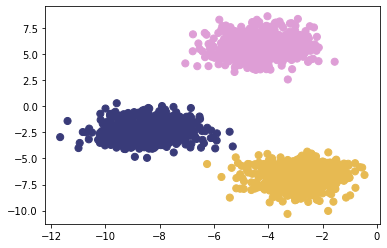

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='tab20b')
plt.show()

## The basis of this exercise will be comparing a basic implementation of Euclidean distance with an optimized version provided in SciPy. First, import the optimized Euclidean distance reference: 

In [22]:
from scipy.spatial.distance import cdist

Identify a subset of X you want to explore. For this example, we are only selecting five points to make the lesson clearer; however, this approach scales to any number of points

In [23]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

## Calculate the distances and choose the index of the shortest distance as a cluster:

In [24]:
for x in X[105:110]:
    calcs = cdist(x.reshape([1,-1]),centroids).squeeze()
    print(calcs, "Cluster Membership: ", np.argmin(calcs))

[ 4.02775036 10.70202291  5.54216027] Cluster Membership:  0
[ 9.7303528   7.20866583 17.44505393] Cluster Membership:  1
[ 4.06676751 11.11317999  5.15897011] Cluster Membership:  0
[ 5.28441816  8.93146403 13.31415736] Cluster Membership:  0
[ 6.29310516 13.46792103  2.66429839] Cluster Membership:  2


Define the k_means function as follows and initialize the k-centroids randomly. Repeat this process until the difference between the new/old centroids equals 0, using the while loop:

In [32]:
def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

centers, labels, centers_hist, labels_hist = k_means(X, 3)

## Zip together the historical steps of centers and their labels:

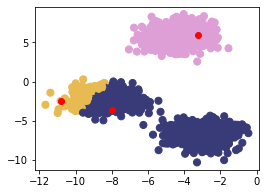

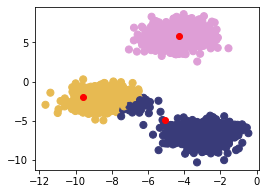

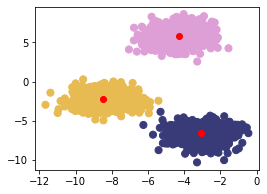

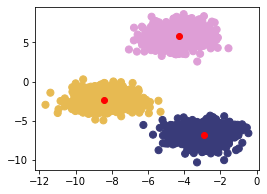

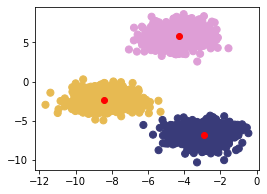

In [34]:
history = zip(centers_hist, labels_hist )
for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()